<a href="https://colab.research.google.com/github/rosembergennes/python/blob/master/ANALISES_GERAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando as BIBLIOTECAS 

In [3]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
!pip install dnspython

import time
from datetime import datetime, timedelta
from selenium import webdriver
import requests
import pandas as pd
from google.colab import files
import os
import numpy as np
from pandas import DataFrame
import pandas as pd
from datetime import timedelta, date ,datetime
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from pymongo import MongoClient
import pprint
import datetime
import json
# Importando numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date ,datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import pandas as pd   
import plotly.graph_objects as go  

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages

## OBTENDO DADOS DO ATLAS MONGODB

In [4]:
# obtendo dados do atlas mongodb
client = MongoClient("mongodb+srv:")
db = client.acoes
collection = db.TCCBIGDATA
data = pd.DataFrame(list(collection.find()))


In [5]:
# limpeza dos dados em Branco 
data = data.dropna(subset=['SETOR'])
data = data.loc[(data['SETOR'] != "")]

## ANALISANDO NEGOCIAÇÕES POR SETOR

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14155 entries, 0 to 14154
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        14155 non-null  object        
 1   DATPRG     14155 non-null  datetime64[ns]
 2   CODBDI     14155 non-null  int64         
 3   CODNEG     14155 non-null  object        
 4   NOMRES     14155 non-null  object        
 5   ESPECI     14155 non-null  object        
 6   PREABE     14155 non-null  float64       
 7   PREMAX     14155 non-null  float64       
 8   PREMIN     14155 non-null  float64       
 9   PREULT     14155 non-null  float64       
 10  PREOFC     14155 non-null  float64       
 11  PREOFV     14155 non-null  float64       
 12  VOLTOT     14155 non-null  float64       
 13  VALAF      14155 non-null  float64       
 14  VALMM      14155 non-null  float64       
 15  PERCAF     14155 non-null  float64       
 16  PERCMM     14155 non-null  float64      

In [7]:
# São definidos os seguintes setores de negociação na bolsa de valores.
data['SETOR'].unique()

array(['Saúde', 'Energia Elétrica', 'Serviços', 'Construção e Engenharia',
       'Hoteis e Restaurantes', 'Financeiros', 'Máquinas e Equipamentos',
       'Tecidos, Vestuário e Calçados', 'Previdência e Seguros',
       'Holdings Diversificadas', 'Água e Saneamento',
       'Exploração de Imóveis', 'Comércio', 'Mineração',
       'Serviços Financeiros Diversos', 'Alimentos', 'Viagens e Lazer',
       'Transporte', 'Bebidas', 'Diversos', 'Outros',
       'Prods. de Uso Pessoal e de Limpeza',
       'Petróleo, Gás e Biocombustíveis', 'Químicos', 'Agropecuária',
       'Siderurgia e Metalurgia', 'Madeira e Papel',
       'Programas e Serviços', 'Comércio e Distribuição',
       'Telefonia Fixa', 'Computadores e Equipamentos', 'Mídia', 'Gás',
       'Material de Transporte', 'Utilidades Domésticas',
       'Telefonia Móvel', 'Equipamentos Elétricos', 'Embalagens',
       'Materiais Diversos'], dtype=object)

In [8]:
# Funcoes Matematicas.
# Soma dos valores de um DataFrame >> df.sum()
# Menor valor de um DataFrame >> df.min()
# Maior valor >> df.max()
# Média dos valores   >> df.mean()
# Mediana dos valores >> df.median()

# Utilizando sum by group sobre a Column *PERCAF obteremos o ranque dos setores
# *PERCAF ( percentual Abertura / Fechamento)

# Para manter as colunas originais 'SETOR','PERCAF', usaremos reset_index(). 
# Caso contrário, 'SETOR'  tornará parte do índice.

df_analise_setor=data.groupby(['SETOR'])['PERCAF'].sum().reset_index()
df_analise_setor.head(8)

,SETOR,PERCAF
0,Agropecuária,-11.98
1,Alimentos,-142.03
2,Bebidas,-13.58
3,Computadores e Equipamentos,-11.02
4,Comércio,-185.35
5,Comércio e Distribuição,-113.54
6,Construção e Engenharia,-498.08
7,Diversos,-75.11


In [9]:
# MENORES RENTABILIDADES PERCENTUALMENTE
df_analise_setor_menor_rentabilidade= df_analise_setor.sort_values("PERCAF",ascending=True)
df_analise_setor_menor_rentabilidade.head(7)

,SETOR,PERCAF
9,Energia Elétrica,-723.52
6,Construção e Engenharia,-498.08
12,Financeiros,-496.56
11,Exploração de Imóveis,-187.16
4,Comércio,-185.35
28,Saúde,-185.03
22,Outros,-168.74


In [10]:
# MAIOR RENTABILIDADES PERCENTUALMENTE
df_analise_setor_maior_rentabilidade= df_analise_setor.sort_values("PERCAF",ascending=False)
df_analise_setor_maior_rentabilidade.head(7)

,SETOR,PERCAF
20,Máquinas e Equipamentos,96.58
14,Holdings Diversificadas,78.08
13,Gás,13.65
10,Equipamentos Elétricos,-0.02
17,Materiais Diversos,-8.81
3,Computadores e Equipamentos,-11.02
0,Agropecuária,-11.98


## GERANDO GRAFICOS PERCENTUAL POR SETOR

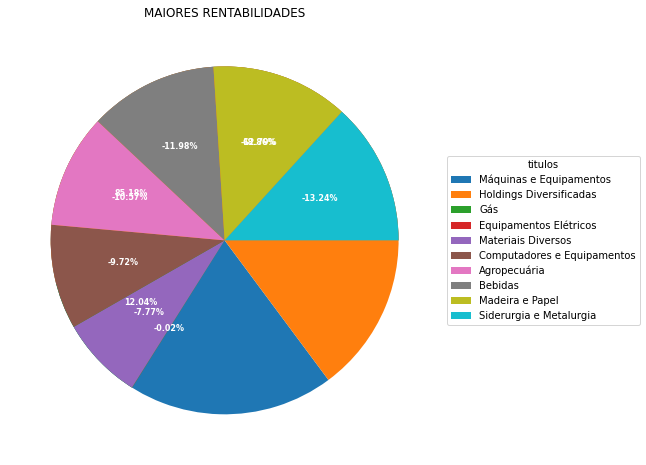

In [11]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_analise_setor_maior_rentabilidade["PERCAF"].head(10)
titulos =  df_analise_setor_maior_rentabilidade["SETOR"].head(10)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES RENTABILIDADES")

plt.show()

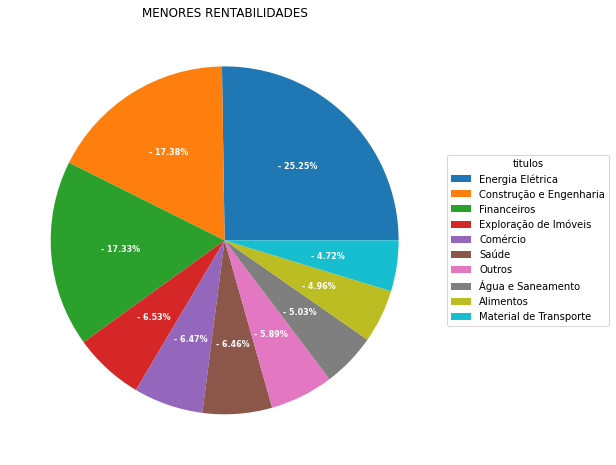

In [12]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
# <<< COMO VALORES SÃO NEGATIVOS TRANSFORMO EM POSSITIVO >>>
# <<< E PARA NÃO FICAR DUVIDA COLOCO UM - NO LABEL DO RETURN >>>
valores =  abs(df_analise_setor_menor_rentabilidade["PERCAF"]).head(10)
titulos =  df_analise_setor_menor_rentabilidade["SETOR"].head(10)

# Calculo para porcentagem dentro do grafico 
# <<<< COMO OS VALORES SÃO NEGATIVO return"-  >>>>
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "- {:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MENORES RENTABILIDADES")

plt.show()

##  *ANALISANDO AÇÃO*

In [13]:
df=data[['DATPRG','CODNEG','NOMRES','ESPECI','PREABE','PREMAX','PREMIN','PREULT']]
df =df.query('CODNEG =="MWET3" ')
df['NOMRES_CODNEG']=df.apply(lambda x:'%s (%s)' % (x['NOMRES'],x['CODNEG']),axis=1)
#print(val)
df = df.sort_values(by='DATPRG')
df=df.reindex()
#df.head(180)

In [14]:
fig = go.Figure(data=[go.Candlestick(x=df['DATPRG'],
                open=df['PREABE'], high=df['PREMAX'],
                low=df['PREMIN'], close=df['PREULT'])
                     ])
# Melhorando visualizamento
fig.update_layout(
    title=df['NOMRES_CODNEG'].values[0]#,  yaxis_title='Titulo Lateral',   
)
fig.show()

In [15]:
fig = go.Figure(data=[go.Candlestick(
    x=df['DATPRG'],
    open=df['PREABE'], high=df['PREMAX'],
    low=df['PREMIN'], close=df['PREULT'],
    increasing_line_color= 'cyan', decreasing_line_color= 'gray'
)])

fig.show()

In [16]:
import plotly.express as px
#fig = go.Figure([go.Scatter(x=df['DATPRG'], y=df['PREULT'])])
fig = px.line(df, x='DATPRG', y='PREULT')

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)
# fig = px.line(df, x='DATPRG', y='PREULT', range_x=['2020-08-01','2020-12-31'])
fig.show()